# チームスタイルを指標としたクラスター分析
チームごとに異なるプレースタイルを可視化、分類するための手法の実装<br>
今回は以下のデータを用いた。<br>
#### 要素
* チーム名
#### 変数
* 攻撃 
* セットプレー
* 左サイド攻撃
* 中央攻撃
* 右サイド攻撃
* ショートカウンター
* ロングカウンター
* 敵陣ポゼッション
* 自陣ポゼッション

[FootballLAB](https://www.football-lab.jp/summary/team_style/j1/?year=2023)より<br>

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [2]:
# 2023.10.29の試合までの試合をもとに、チームごとに戦術の傾向を数値化したデータを利用
# df_teamstyle = pd.read_csv('../../api_data/team_style_2023.csv')
df_teamstyle = pd.read_csv('../../scraping/team_style_2023.csv')
df_teamstyle.head(6)

,team.name,atk.set.play,left.side.attack,center.attack,right.side.attack,short.counter,long.counter,enemy.camp.possession,self.camp.possession
0,Vissel Kobe,58,57,44,59,59,51,45,46
1,Yokohama F･Marinos,42,47,61,43,43,41,61,61
2,Urawa Reds,46,36,46,55,41,42,54,61
3,Sanfrecce Hiroshima,83,70,63,66,76,65,49,40
4,Nagoya Grampus,50,41,39,42,48,64,42,45
5,Kashima Antlers,49,44,46,55,46,46,43,44


In [3]:
# 確認用（データフレームを2次元配列に変換した場合の一列目のデータ）
df_teamstyle.values[0,:]

array(['Vissel Kobe', 58, 57, 44, 59, 59, 51, 45, 46], dtype=object)

In [7]:
# 上記実行結果から0、1列目のデータを取り除いたものを検証する
X = df_teamstyle.values[:,1:]
X

array([[58, 57, 44, 59, 59, 51, 45, 46],
       [42, 47, 61, 43, 43, 41, 61, 61],
       [46, 36, 46, 55, 41, 42, 54, 61],
       [83, 70, 63, 66, 76, 65, 49, 40],
       [50, 41, 39, 42, 48, 64, 42, 45],
       [49, 44, 46, 55, 46, 46, 43, 44],
       [48, 57, 42, 52, 45, 45, 49, 55],
       [43, 50, 45, 59, 54, 46, 45, 37],
       [40, 61, 56, 52, 45, 36, 75, 55],
       [39, 52, 54, 35, 32, 34, 66, 74],
       [50, 69, 41, 39, 48, 45, 44, 44],
       [45, 54, 34, 43, 48, 57, 50, 65],
       [52, 42, 69, 66, 68, 69, 50, 50],
       [55, 35, 50, 60, 52, 43, 37, 38],
       [39, 49, 70, 35, 47, 46, 63, 56],
       [49, 44, 54, 38, 49, 51, 42, 46],
       [61, 55, 45, 57, 59, 65, 38, 39],
       [51, 38, 42, 45, 40, 52, 47, 47]], dtype=object)

## 非階層的クラスタリング

### 多次元尺度更生法（MSD）の実装

In [8]:
# 今回用いるデータはスケールが１００で固定されているため、標準化しない
# n_componentsは次元削減後の次元を表す
mds = MDS(n_components = 3)
Y = mds.fit_transform(X)

c:\Users\haruc\miniconda3\envs\sk_py311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


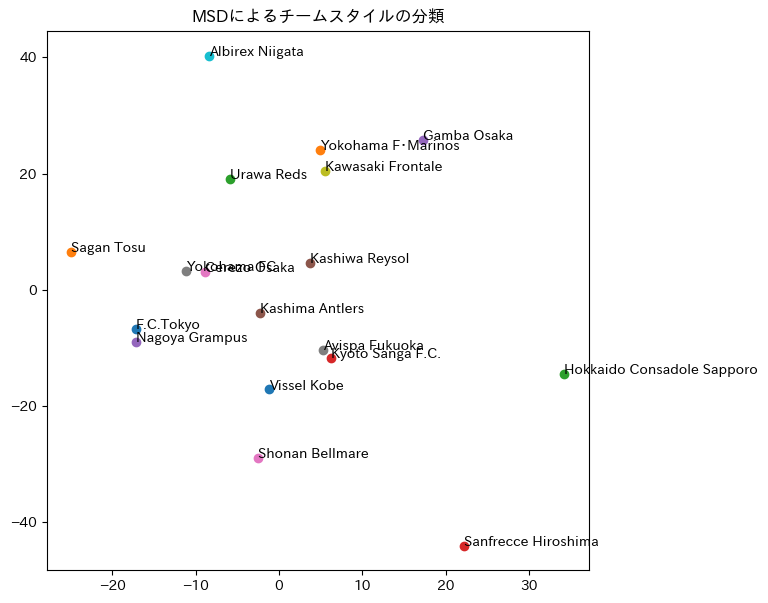

In [9]:
%matplotlib inline
# 表示に順位を表示したい場合
lab_standing = df_teamstyle.reset_index().values[:,0]+1
# 表示にチーム名を指定したい場合
labels = df_teamstyle.values[:,0]
plt.figure(figsize=(7,7))
for i in range(18):
    plt.scatter(Y[i,0],Y[i,1])
    plt.text(Y[i,0],Y[i,1],labels[i])
plt.title("MSDによるチームスタイルの分類")
plt.show()

### 主成分分析（PCA）の実装

In [10]:
pca = PCA(n_components = 3)
Y_p = pca.fit_transform(X)

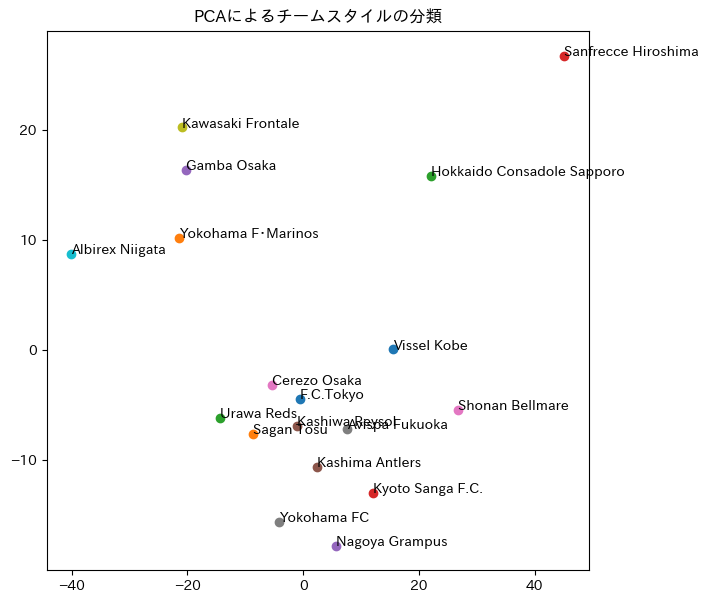

In [11]:
%matplotlib inline
plt.figure(figsize=(7,7))
for i in range(18):
    plt.scatter(Y_p[i,0],Y_p[i,1])
    plt.text(Y_p[i,0],Y_p[i,1],labels[i])
plt.title("PCAによるチームスタイルの分類")
plt.show()

### t-sne

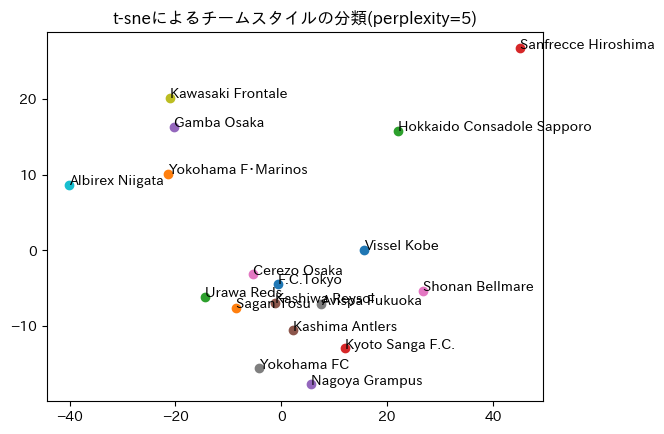

<Figure size 700x700 with 0 Axes>

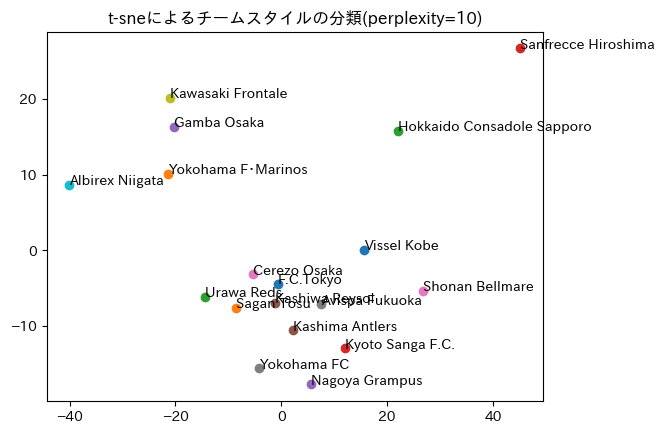

<Figure size 700x700 with 0 Axes>

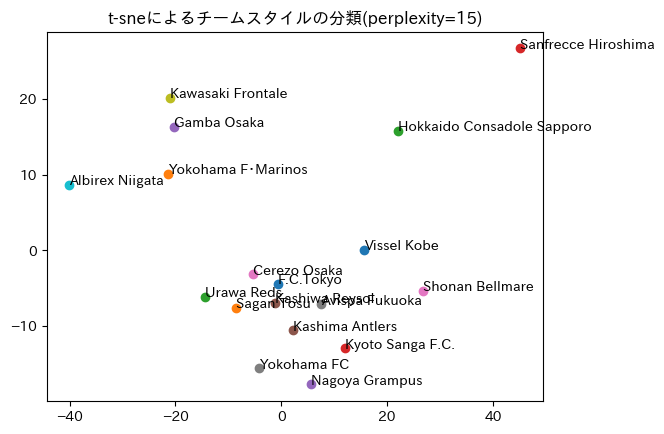

<Figure size 700x700 with 0 Axes>

In [12]:
for i in range(5,16,5):
    tsne = TSNE(n_components = 3, perplexity=i)
    Y_t = tsne.fit_transform(X)

    for j in range(18):
        plt.scatter(Y_p[j,0],Y_p[j,1])
        plt.text(Y_p[j,0],Y_p[j,1],labels[j])
    plt.title(f"t-sneによるチームスタイルの分類(perplexity={i})")
    plt.figure(figsize=(7,7))
    plt.show()


## 階層的クラスタリング

### ヴォード法

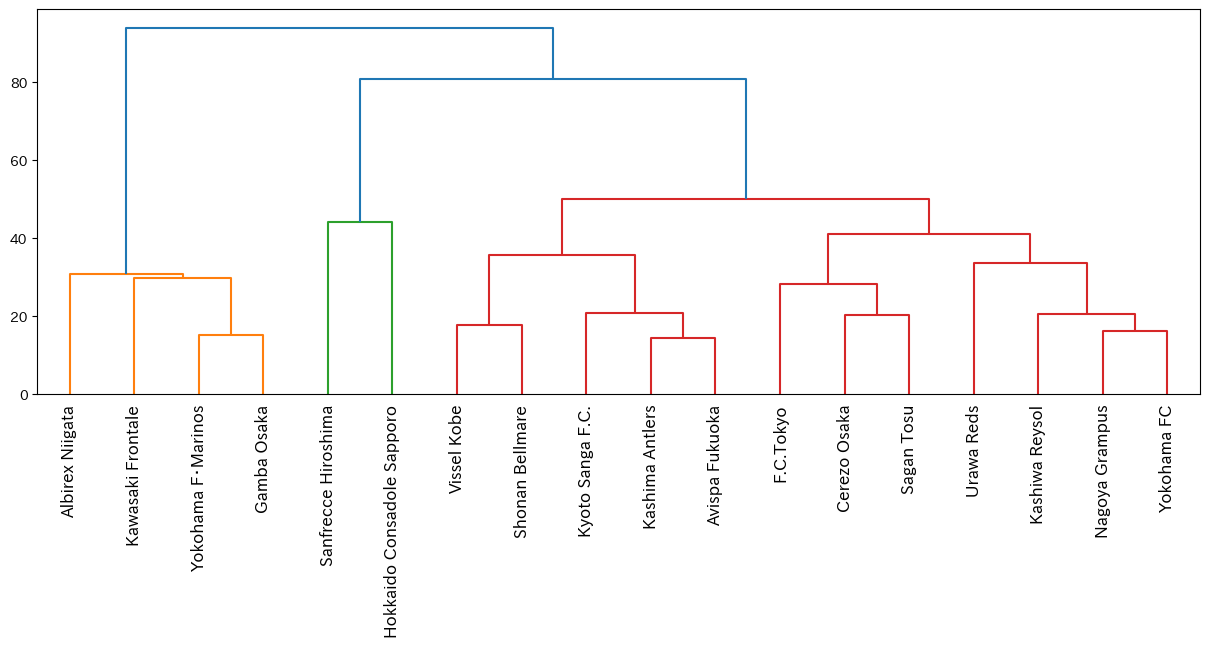

In [16]:
result = linkage(X, method='ward')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

### 最短距離法

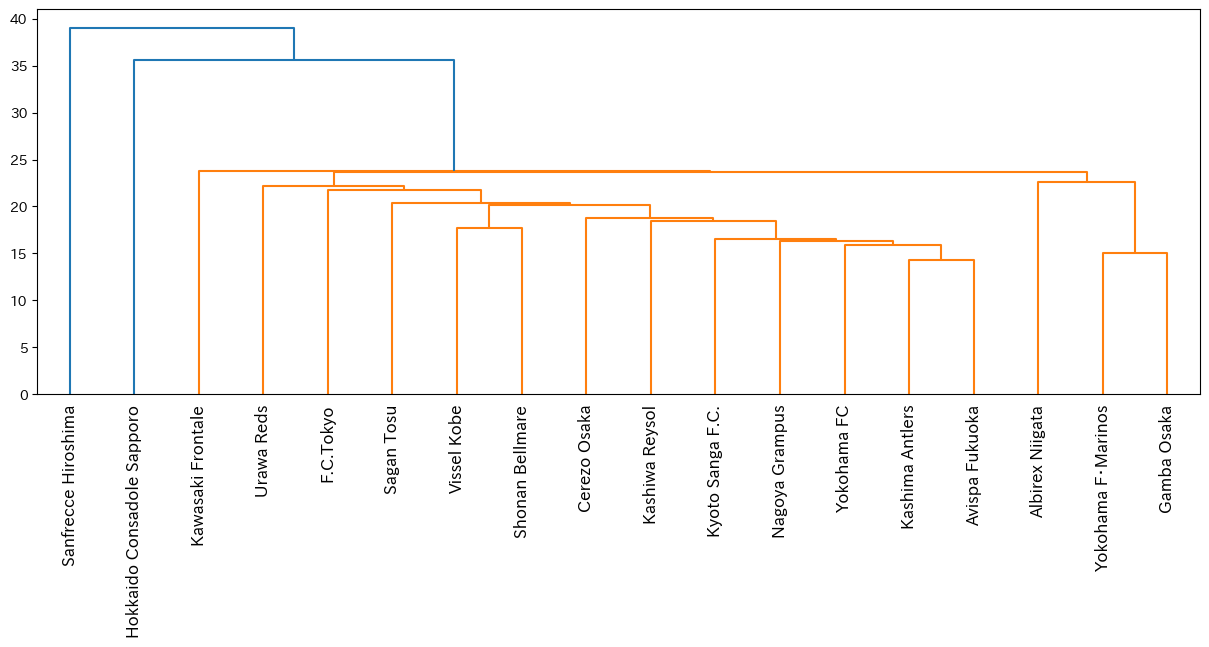

In [17]:
result = linkage(X, method='single')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

### 最長距離法

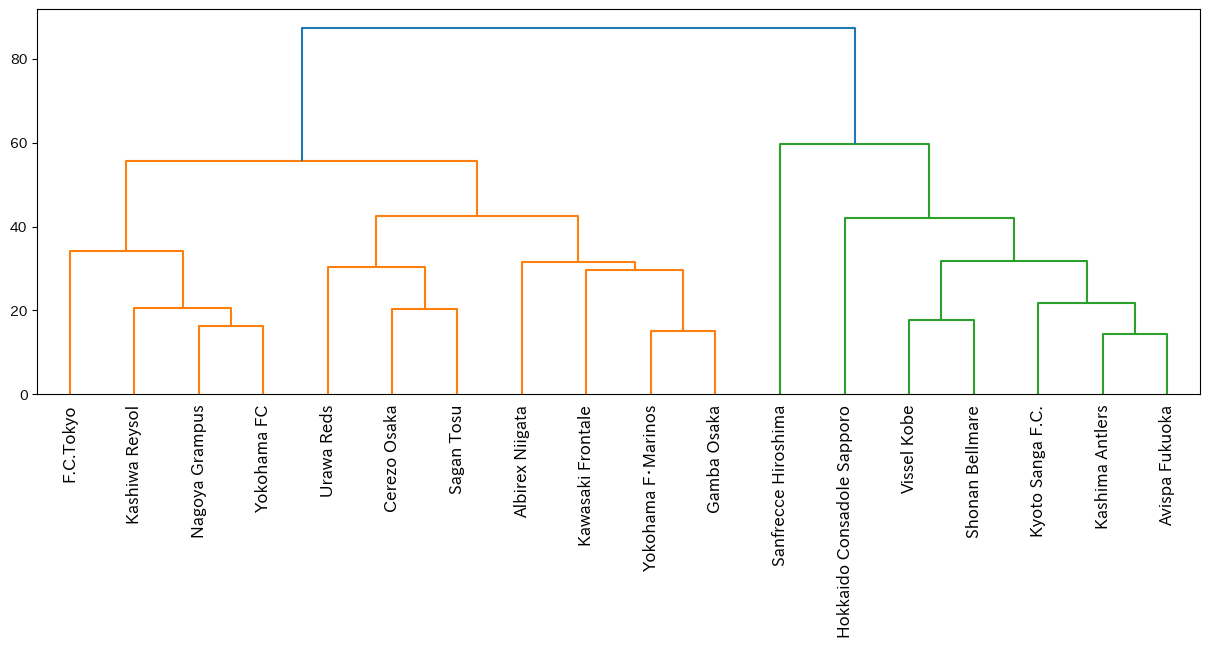

In [18]:
result = linkage(X, method='complete')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

### 重心法

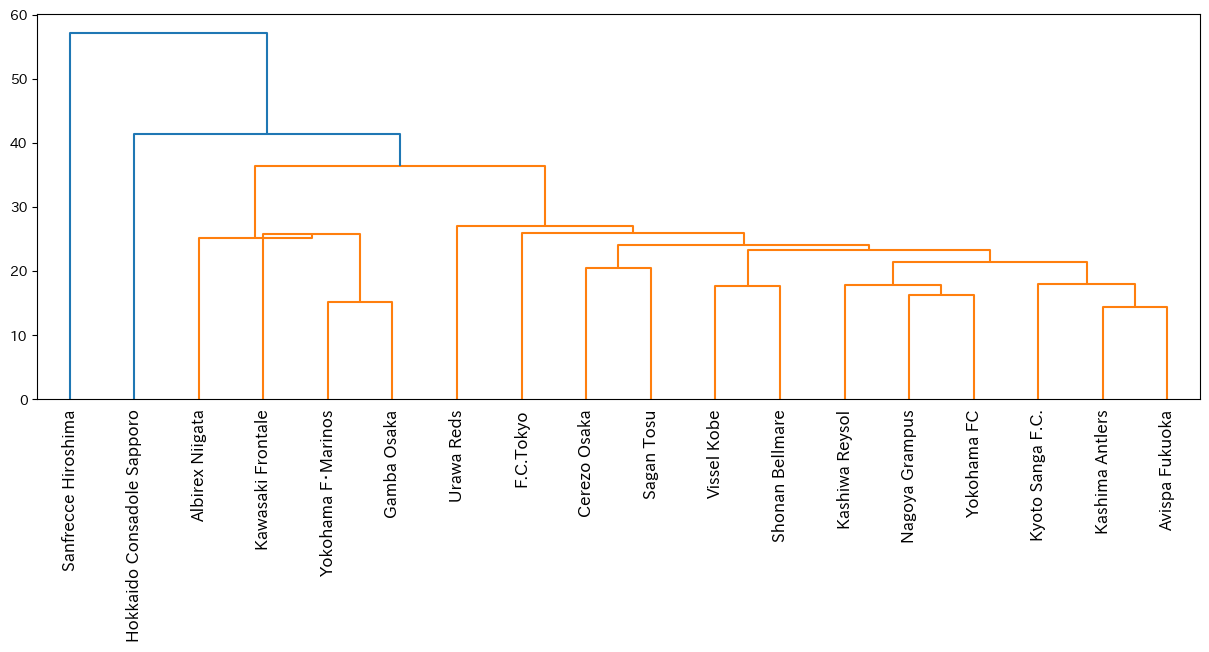

In [19]:
result = linkage(X, method='centroid')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

## 追実験
先程の変数に
* ホームでの得点率 * 100
* ホームでの失点率 * 100
* アウェイでの得点率 * 100
* アウェイでの失点率 * 100<br>
を付与してクラスタリングを行う。
実際の得点数としなかった理由は、既存の変数とスケールを合わせるためである。

<strong>
注意<br>
スクレイピングしたデータと、順位表のデータを掲載するサイトが異なるため、チーム名が異なる.<br>
順位をキーとして結合すれば順位（インデックスをもとに結合すれば結合できると考えたが、スクレイピングしたデータは順位を正確に表していなかった。。）<br>
そのため、分類する際はteam.nameのカラムを確認して、手作業でインデックスごと入れ替え・入れ替え後のインデックスをもとに結合する<br>

In [74]:
df_status = pd.read_csv("../../api_data/standing/standing_2023.csv")
df_goals = \
    df_status.apply(lambda row: [
        row["team.name"],
        row["home.goals.for"] / (row["home.goals.for"] + row["away.goals.for"]) *100,
        row["away.goals.for"] / (row["home.goals.for"] + row["away.goals.for"]) *100,
        row["home.goals.against"] / (row["home.goals.against"] + row["away.goals.against"]) *100,
        row["away.goals.against"] / (row["home.goals.against"] + row["away.goals.against"]) *100
    ], axis=1, result_type='expand')
df_goals = df_goals.rename(columns={0:"team.name",1:"home.goals.for.per",2:"away:goals.for.per",
                                    3:"home.goals.against.per",4:"away.goals.against.per"})
df_goals.head(3)

,team.name,home.goals.for.per,away:goals.for.per,home.goals.against.per,away.goals.against.per
0,Vissel Kobe,50.980392,49.019608,48.000000,52.000000
1,Yokohama F. Marinos,57.692308,42.307692,38.888889,61.111111
2,Urawa,57.142857,42.857143,45.454545,54.545455


---
---

In [65]:
df_reindex_teamstyle = df_teamstyle['team.name'].copy()
df_reindex_status = df_status['team.name'].copy()
df_reindex = pd.merge(df_reindex_teamstyle, df_reindex_status, left_index=True, right_index=True,)


,team.name_x,team.name_y
0,Vissel Kobe,Vissel Kobe
1,Yokohama F･Marinos,Yokohama F. Marinos
2,Urawa Reds,Urawa
3,Kashima Antlers,Kashima
4,Sanfrecce Hiroshima,Sanfrecce Hiroshima
5,Nagoya Grampus,Nagoya Grampus
6,Cerezo Osaka,Cerezo Osaka
7,Avispa Fukuoka,Avispa Fukuoka
8,Kawasaki Frontale,Kawasaki Frontale
9,F.C.Tokyo,FC Tokyo


In [ ]:
df_reindex

In [66]:
# インデックスの調整を行う...
# df_teamstyle.iloc[[13, 14]] = df_teamstyle.iloc[[14, 13]].values
# 可視化して確認しやすくするため
# df_reindex['team.name_x'].iloc[[13, 14]] = df_reindex['team.name_x'].iloc[[14, 13]].values

---
---

In [82]:
df_goalstyle = pd.merge(df_teamstyle, df_goals, left_index=True, right_index=True ,how="inner").drop(columns={'team.name_y'})
df_goalstyle.head(5)

,team.name_x,atk.set.play,left.side.attack,center.attack,right.side.attack,short.counter,long.counter,enemy.camp.possession,self.camp.possession,home.goals.for.per,away:goals.for.per,home.goals.against.per,away.goals.against.per
0,Vissel Kobe,58,57,44,59,59,51,45,46,50.980392,49.019608,48.000000,52.000000
1,Yokohama F･Marinos,42,47,61,43,43,41,61,61,57.692308,42.307692,38.888889,61.111111
2,Urawa Reds,46,36,46,55,41,42,54,61,57.142857,42.857143,45.454545,54.545455
3,Kashima Antlers,49,44,46,55,46,46,43,44,51.282051,48.717949,50.000000,50.000000
4,Sanfrecce Hiroshima,83,70,63,66,76,65,49,40,63.888889,36.111111,48.148148,51.851852


### ヴォード法

[[58 57 44 59 59 51 45 46 50.98039215686274 49.01960784313725 48.0 52.0]
 [42 47 61 43 43 41 61 61 57.692307692307686 42.30769230769231
  38.88888888888889 61.111111111111114]
 [46 36 46 55 41 42 54 61 57.14285714285714 42.857142857142854
  45.45454545454545 54.54545454545454]
 [49 44 46 55 46 46 43 44 51.28205128205128 48.717948717948715 50.0 50.0]
 [83 70 63 66 76 65 49 40 63.888888888888886 36.11111111111111
  48.148148148148145 51.85185185185185]
 [50 41 39 42 48 64 42 45 58.333333333333336 41.66666666666667
  36.666666666666664 63.33333333333333]
 [48 57 42 52 45 45 49 55 55.26315789473685 44.73684210526316 50.0 50.0]
 [43 50 45 59 54 46 45 37 50.0 50.0 41.935483870967744 58.06451612903226]
 [40 61 56 52 45 36 75 55 48.717948717948715 51.28205128205128
  41.02564102564102 58.97435897435898]
 [50 69 41 39 48 45 44 44 74.35897435897436 25.64102564102564 47.5 52.5]
 [39 52 54 35 32 34 66 74 57.57575757575758 42.42424242424242
  53.84615384615385 46.15384615384615]
 [45 54 34 43 48 57

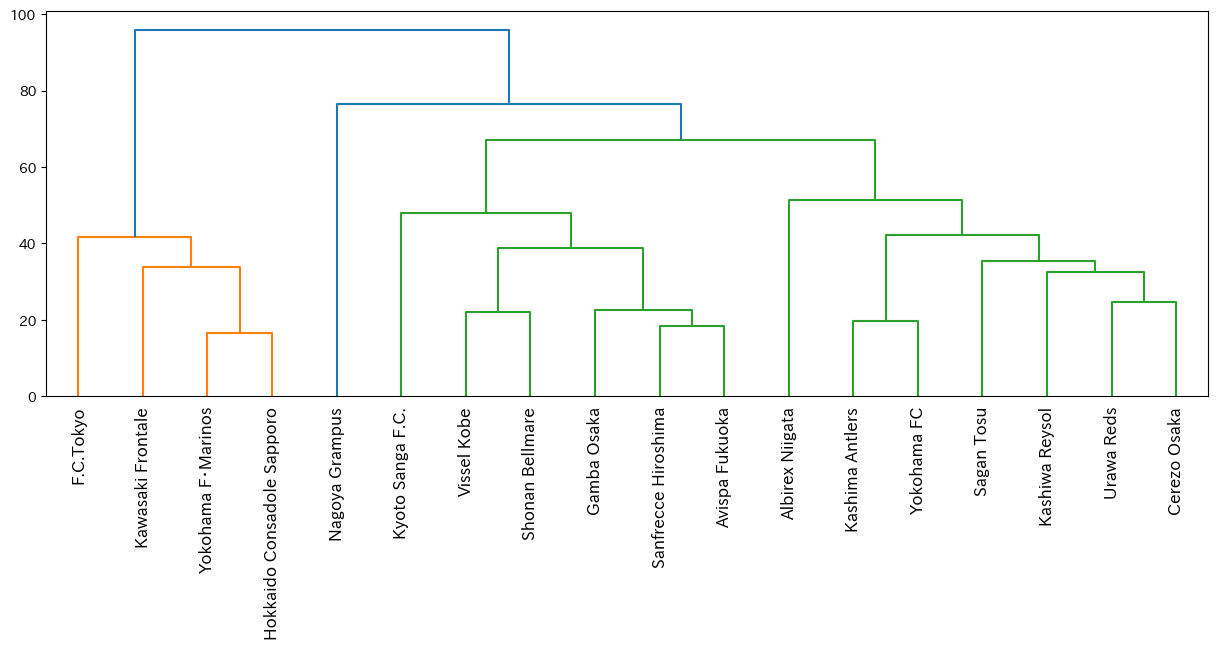

In [83]:
X = df_goalstyle.values[:,1:]
print(X)
result = linkage(X, method='ward')
plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

In [84]:
# 上記の結果から4つにグループ分けを行う。
cluster = fcluster(result, t = 65, criterion = 'distance')
cluster


array([2, 1, 3, 2, 4, 3, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 2, 3], dtype=int32)

C:\Users\haruc\AppData\Local\Temp\ipykernel_10952\3943130304.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=10)
C:\Users\haruc\AppData\Local\Temp\ipykernel_10952\3943130304.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=10)
C:\Users\haruc\AppData\Local\Temp\ipykernel_10952\3943130304.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=10)
C:\Users\haruc\AppData\Local\Temp\ipykernel_10952\3943130304.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

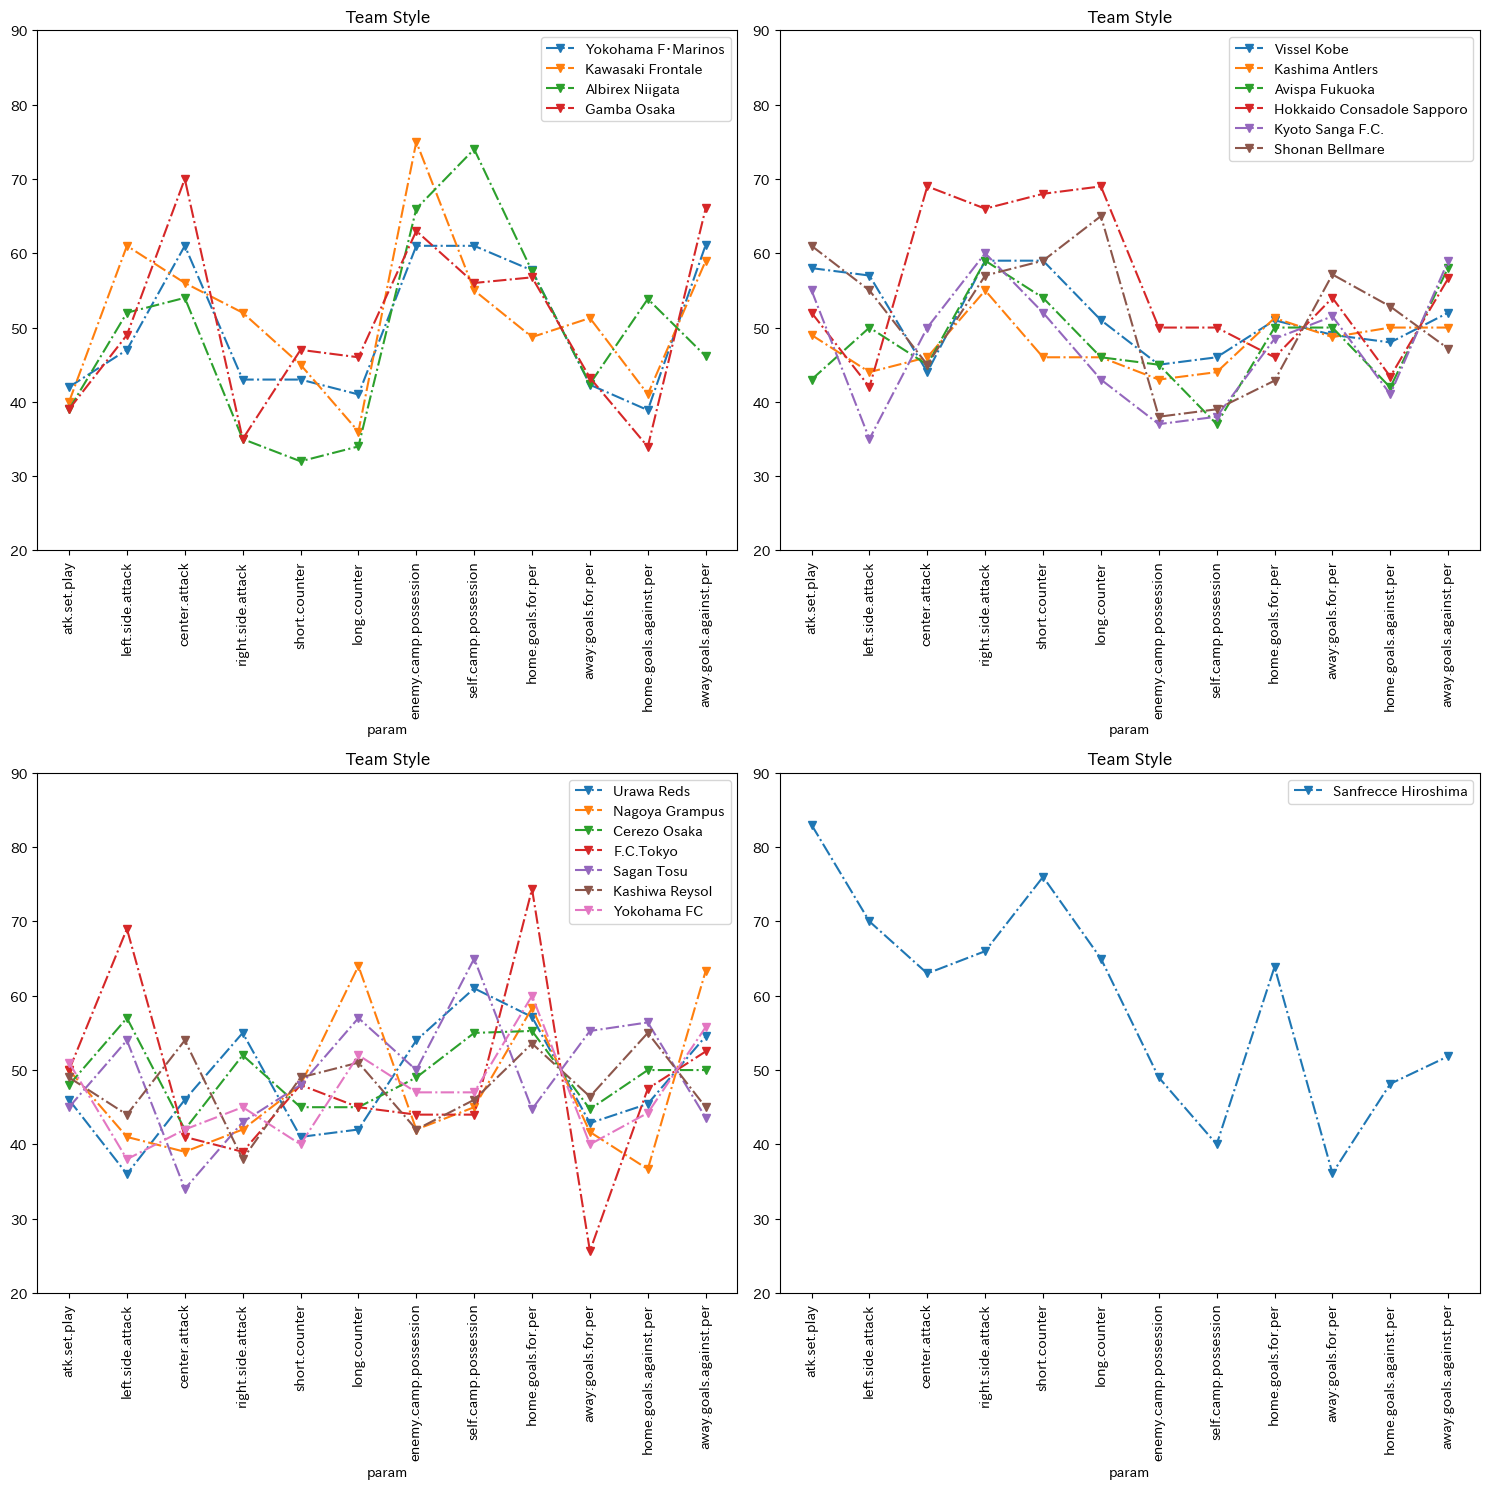

In [113]:
# 割り振られたクラスターを参考に、折れ線グラフを書き、分類が妥当かクラスターごとに可視化して確認する
df_goalstyle = df_goalstyle.assign(cluster = cluster)
df_goalstyle['cluster'] = df_goalstyle['cluster'].astype('str')

# 枠の指定
fig, ax = plt.subplots(2,2, figsize=(15,15),tight_layout=True)

for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '1'])):
    ax[0,0].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '1'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '1'].T.iloc[0,i], linestyle="-.")
for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '2'])):
    ax[0,1].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '2'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '2'].T.iloc[0,i], linestyle="-.")
for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '3'])):
    ax[1,0].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '3'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '3'].T.iloc[0,i], linestyle="-.")
for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '4'])):
    ax[1,1].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '4'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '4'].T.iloc[0,i], linestyle="-.")
# y軸の主要なロケータを設定
for i in range(2):
    for j in range(2):
        ax[i,j].set(title='Team Style', xlabel='param', yticks=[20,30,40,50,60,70,80,90])
        ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=10)  
# 各サブプロットに凡例を表示
for axis in ax.flat:
    axis.legend(fontsize=10)
plt.show()


##### cluster1
* 全クラスターの中で、セットプレーを起点に攻撃に転じる指数が最も低い群
* 自陣・敵陣とも、ボールを保持できている指数が最も高い
* アウェイゲームで失点する割合が高いチーム
#### cluster2
* アウェイゲームで得点する比率のほうが高い
* 右サイトからの攻撃が比較的高い傾向にある
#### cluster3
* 全体的に50~60をとる安定した群
#### cluster4
* 左サイドからの攻撃指数が高い
* ホームでの得点割合が最も高い
#### cluster5
* セットプレー、ショートカウンターの攻撃指数が最も高い
* ほかの群と比べ、比較的ホームでの得点割合が高い傾向にある

In [35]:
# 既存のcsvファイルにクラスター情報を付加
df_goalstyle.to_csv('../../api_data/statistics/team/team_style_2023.csv',index=False)